In [1]:
# Let's get the modules that we need first
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# We'll pull in the data
PATH = r'./data'
ALL_FILES = glob.glob(os.path.join(PATH, "attendence-stadium-*.csv"))
DF_FROM_EACH_FILE = (pd.read_csv(f) for f in ALL_FILES)
ATTENDENCE = pd.concat(DF_FROM_EACH_FILE, ignore_index=True)

In [3]:
# Fixing the date
for count in range(len(ATTENDENCE['GAME_DT'])):
    bad_date = str(ATTENDENCE['GAME_DT'][count])
    year = bad_date[0:4]
    month = bad_date[4:6]
    day = bad_date[6:8]
    new_date = year + "-" + month + "-" + day
    ATTENDENCE.at[count, 'GAME_DT'] = pd.to_datetime(new_date)
    ATTENDENCE.at[count, 'YEAR'] = year

In [4]:
# Let's sort it and only get attendence for Minute Maid Park
ATTENDENCE = ATTENDENCE.sort_values(by='GAME_DT')
ATTENDENCE = ATTENDENCE.reset_index(drop=True)

HOU03 = ATTENDENCE.loc[ATTENDENCE['PARK_ID'] == "HOU03"]

In [5]:
print("SUMMARY of Attedence at Minute Maid Park")
print(HOU03.describe())
# This shows that the average attendence sits around 30,000
# Its had a max of 44,000 and a low of 11,686

SUMMARY of Attedence at Minute Maid Park
       ATTEND_PARK_CT
count     1452.000000
mean     30570.674931
std       7952.363975
min      11686.000000
25%      24480.000000
50%      30840.500000
75%      36821.250000
max      44203.000000


In [6]:
record = pd.read_csv('data/Houston_Record_2000-2017.csv', index_col='YEAR')
# Let's look at the 'Stros record over those years
record

,W,L,Pct.,GB,Home,Road
YEAR,,,,,,
2000,72,90,0.444,-23.0,39-42,33-48
2001,93,69,0.574,0.0,44-37,49-32
2002,84,78,0.519,-13.0,47-34,37-44
2003,87,75,0.537,-1.0,48-33,39-42
2004,92,70,0.568,-13.0,48-33,44-37
2005,89,73,0.549,-11.0,53-28,36-45
2006,82,80,0.506,-1.5,44-37,38-43
2007,73,89,0.451,-12.0,42-39,31-50
2008,86,75,0.534,-11.0,47-33,39-42


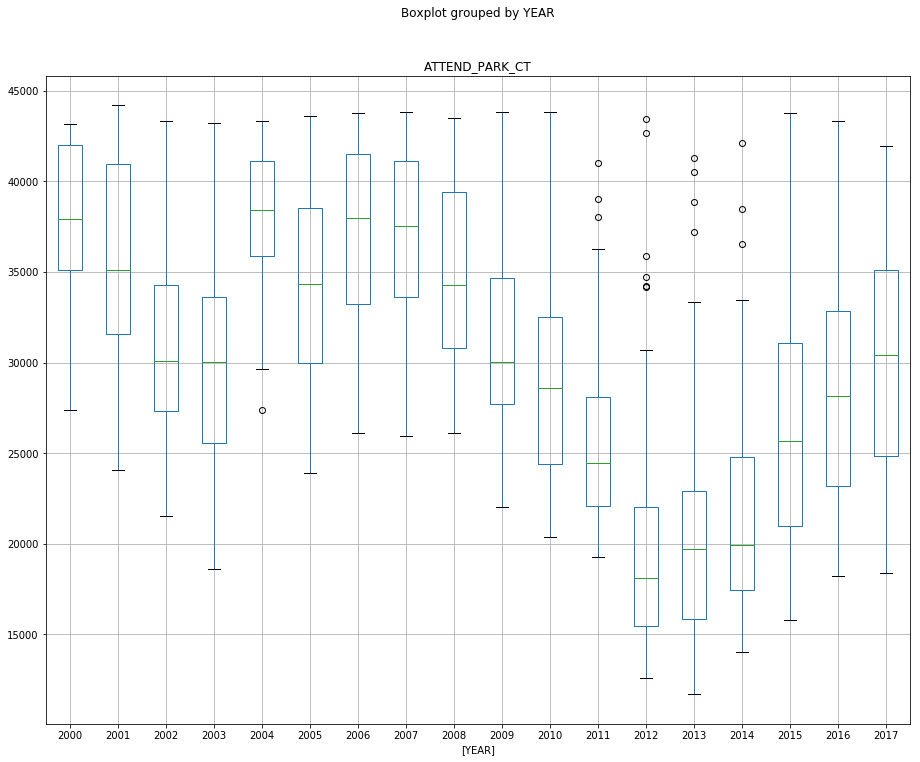

In [12]:
HOU_GRAPH = HOU03.groupby(HOU03.YEAR)
HOU03.boxplot(by='YEAR')
plt.rcParams['figure.figsize'] = (15,12)
plt.show()

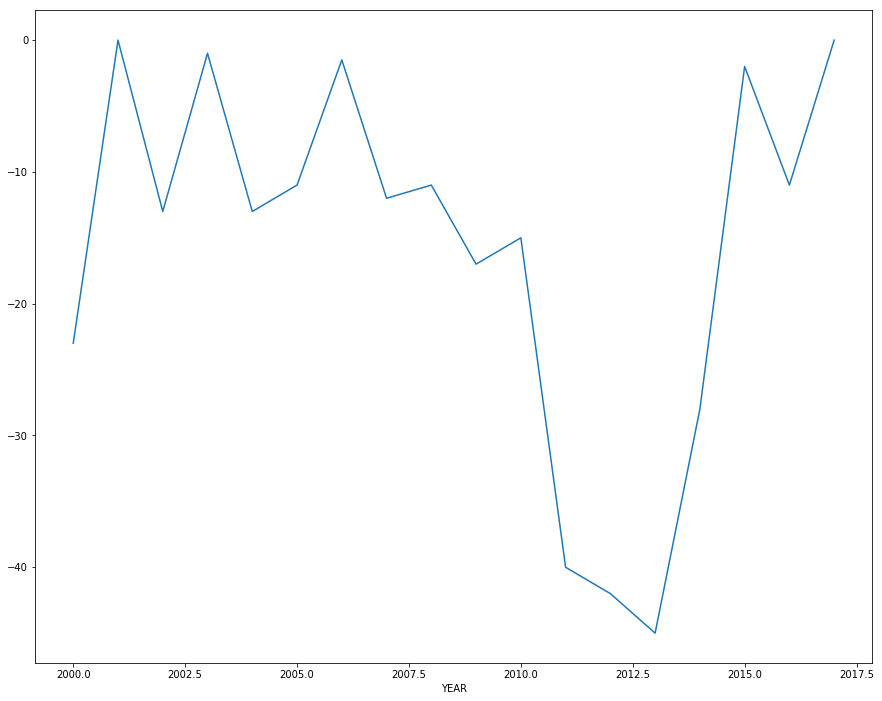

In [8]:
games_back = record['GB']
games_back.plot()

In [9]:
test = HOU03.groupby(HOU03.YEAR).mean()
test = test.assign(GB=record['GB'].values)

ATTEND_PARK_CT    18
GB                18
dtype: int64

In [10]:
sample_r = test['ATTEND_PARK_CT'].corr(test['GB'])
# Critical R at .5 when n is 18 = (+/-) 0.468
critical_r = 0.468
print("sample_r: %f critical_r: %f" % (sample_r, critical_r))

sample_r: 0.650538 critical_r: 0.468000


In [11]:
sample_r > critical_r

True